# Shape parameter selection
### Table of Contents
1. [Shape parameter selection](##Shape-parameter-selection)
2. [Gradient Enhanced Models](##gradient-enhanced-models)

## KFold cross validation

4.941713361323833

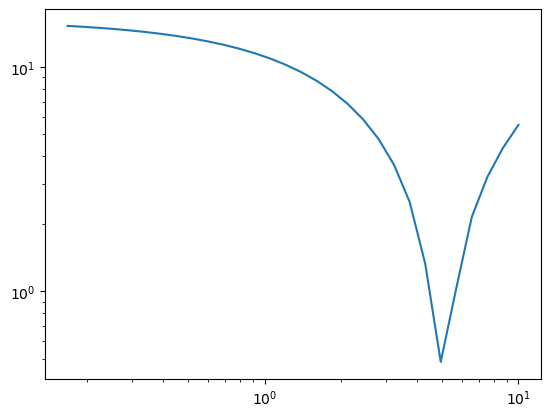

In [3]:
from rbf_models import RBFmodel #import the rbf model class
import numpy as np
from pyDOE import lhs #latin hypercube sampling, can be replaced with np.random

func = lambda x: np.sin(3 * np.pi * x)
grad = lambda x: 3 * np.pi * np.cos(3 * np.pi * x)

X = lhs(1, samples = 7, criterion = 'm')
y = func(X)
dy = grad(X)

model = RBFmodel(X, y, dy = dy) #Create the model instance.

# import the preprocessing module and HyperParameterSlection class
from preprocessing import HyperParameterSelection

HyperParameterSelection.kfold(model, fig = True)

### Plot results

In [ ]:
import matplotlib.pyplot as plt

x_test = np.linspace(0, 1, 100).reshape(-1,1)
y_pred, dy_pred = model(x_test)

plt.plot(x_test, func(x_test), 'k', label = 'Underlying Function')
plt.plot(X, y, 'ko', label = 'Samples')
plt.plot(x_test, y_pred, 'r--', label = 'Function Model')
plt.legend()

## Validation set selection

This method uses a validation set of function values to find the optimium shape parameter.

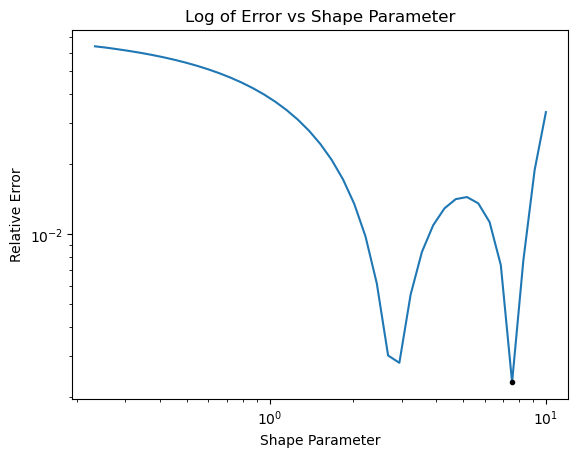

In [5]:
from rbf_models import RBFmodel #import the rbf model class
import numpy as np
from pyDOE import lhs #latin hypercube sampling, can be replaced with np.random

func = lambda x: np.sin(3 * np.pi * x)
grad = lambda x: 3 * np.pi * np.cos(3 * np.pi * x)

X = lhs(1, samples = 7, criterion = 'm')
y = func(X)
dy = grad(X)

model = RBFmodel(X, y, dy = dy) #Create the model instance.

# import the preprocessing module and HyperParameterSlection class
from preprocessing import HyperParameterSelection

#create a validation set
Xvalid = lhs(1, samples = 15, criterion = 'm')
y_valid = func(Xvalid)

#pass the validation data to the method, as well as the model instance.
opt_epsi = HyperParameterSelection.validation_set(model, Xvalid, y_valid, fig = True) # setting fig to true creates a log plot of the error.
#the method automatically trains the model with the optimim shape parameter, but also return it.

### Plot the results

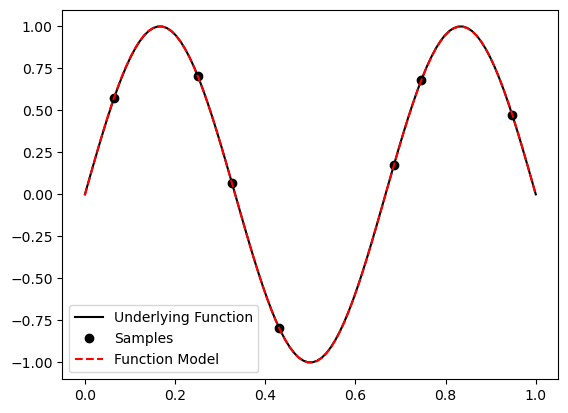

In [7]:
import matplotlib.pyplot as plt

x_test = np.linspace(0, 1, 100).reshape(-1,1)
y_pred, dy_pred = model(x_test)

plt.plot(x_test, func(x_test), 'k', label = 'Underlying Function')
plt.plot(X, y, 'ko', label = 'Samples')
plt.plot(x_test, y_pred, 'r--', label = 'Function Model')
plt.legend()

## Gradient validation 

This method uses the sampled gradient information passed to the model to find the optimium shape parameter that produces the lowest error w.r.t the gradient information.

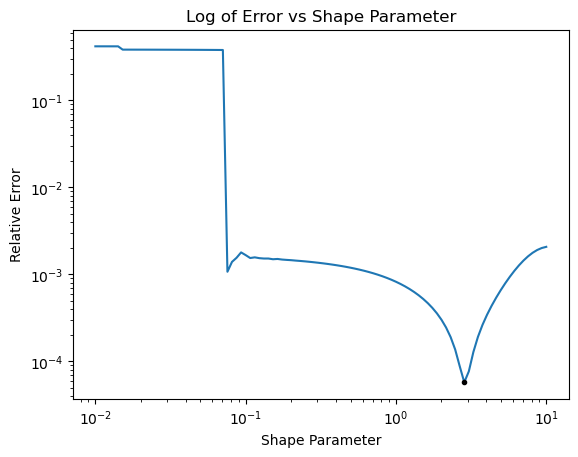

In [9]:
from rbf_models import RBFmodel #import the rbf model class
import numpy as np
from pyDOE import lhs #latin hypercube sampling, can be replaced with np.random

func = lambda x: np.sin(3 * np.pi * x)
grad = lambda x: 3 * np.pi * np.cos(3 * np.pi * x)

X = lhs(1, samples = 7, criterion = 'm')
y = func(X)
dy = grad(X)

model = RBFmodel(X, y, dy = dy) #Create the model instance.

# import the preprocessing module and HyperParameterSlection class
from preprocessing import HyperParameterSelection

#create a validation set
Xvalid = lhs(1, samples = 15, criterion = 'm')
y_valid = func(Xvalid)

#pass the model instance.
opt_epsi = HyperParameterSelection.gradient_validation(model, fig = True) # setting fig to true creates a log plot of the error.
#the method automatically trains the model with the optimim shape parameter, but also return it.

### Plot results

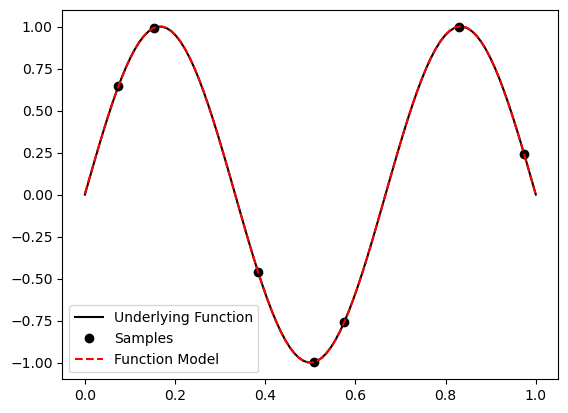

In [11]:
import matplotlib.pyplot as plt

x_test = np.linspace(0, 1, 100).reshape(-1,1)
y_pred, dy_pred = model(x_test)

plt.plot(x_test, func(x_test), 'k', label = 'Underlying Function')
plt.plot(X, y, 'ko', label = 'Samples')
plt.plot(x_test, y_pred, 'r--', label = 'Function Model')
plt.legend()